# Pyber Ride Sharing

## Analysis

- The majority of fares, rides, and drivers are concentrated in urban city types.
- Average fares tend to be higher in rural areas.
- Although the percent of total fares is highest in urban areas, the average fare is lowest. The quantity of rides and drivers make up for the low average fare in contributing to total fare amount.

In [27]:
# import dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns

# Format floats
pd.options.display.float_format = '${:,.2f}'.format

In [28]:
# Load data

city_data = pd.read_csv("Resources/city_data.csv")
ride_data = pd.read_csv("Resources/ride_data.csv")

In [29]:
# merge two datasets
city_ride_data = pd.merge(city_data, ride_data, on="city", how="outer")
city_ride_data.head(10)

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,$5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,$5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,$30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,$12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,$17.91,8784212854829
5,Kelseyland,63,Urban,2016-10-24 15:15:46,$33.56,4797969661996
6,Kelseyland,63,Urban,2016-06-06 13:54:23,$20.81,9811478565448
7,Kelseyland,63,Urban,2016-08-10 07:02:40,$44.53,1563171128434
8,Kelseyland,63,Urban,2016-07-05 17:37:13,$29.02,6897992353955
9,Kelseyland,63,Urban,2016-04-25 02:18:31,$20.05,1148374505062


In [30]:
# groupby city
groupByCity_df = city_ride_data.groupby(['city'])

In [31]:
# Combine dataset

ride_sharing = pd.DataFrame({"Average Fare ($)": groupByCity_df["fare"].mean(),
                            "Total Number of Rides (Per City)": groupByCity_df["ride_id"].count(),
                            "Total Number of Drivers": groupByCity_df["driver_count"].max(),
                            "City Type": groupByCity_df["type"].max()})

In [32]:
# Dropping Port James data point because it creates an outlier in the bubble chart. Removing outlier doesn't change 
# remaining results. 
rev_ride_sharing = ride_sharing.drop(['Port James'])

## Bubble Plot of Ride Sharing Data

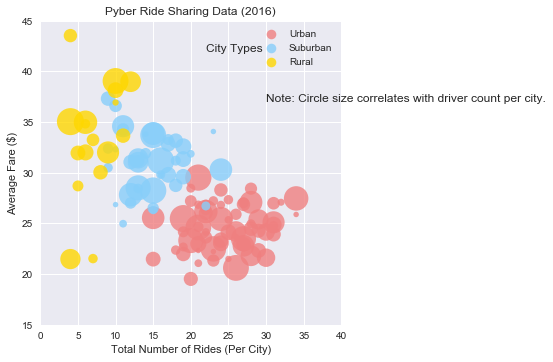

In [33]:
# Create bubble chart using Seaborn

marker_size = (rev_ride_sharing['Total Number of Drivers']*10)
sns.set(style="darkgrid")
bubble_plot = sns.lmplot(x = "Total Number of Rides (Per City)", y = "Average Fare ($)", data = rev_ride_sharing,
                         hue= "City Type", palette=dict(Urban="lightcoral", Suburban="lightskyblue", Rural="gold"), 
                         fit_reg=False, scatter_kws={'s': marker_size}, legend=False)
bubble_plot = (bubble_plot.set(xlim=(0, 40), ylim=(15, 45)))

# Format with matplotlib
plt.title('Pyber Ride Sharing Data (2016)')
plt.text(30, 37, s="Note: Circle size correlates with driver count per city.", horizontalalignment="left")
plt.text(22, 42, s="City Types")
plt.legend(loc='upper right', markerscale = 0.5)

In [34]:
# Determine % of total fares by city type
# Determine total fare amount
total_fare = city_ride_data["fare"].sum()
"${:,.2f}".format(total_fare)

'$64,669.12'

In [35]:
# Groupby city type
groupByCityType_df = city_ride_data.groupby(['type'])

In [36]:
fares_type = pd.DataFrame({"Total Fares by City Type": groupByCityType_df["fare"].sum()})
fares_type

,Total Fares by City Type
type,
Rural,"$4,255.09"
Suburban,"$20,335.69"
Urban,"$40,078.34"


## Total Fares by City Type

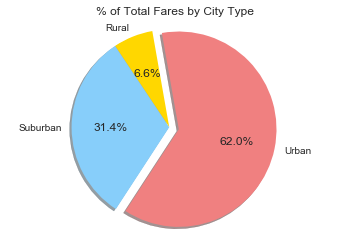

In [37]:
city_types = ["Rural", "Suburban", "Urban"]
total_fares = [4255.09, 20335.69, 40078.34]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(total_fares, explode=explode, labels=city_types, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=100)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.title('% of Total Fares by City Type')

plt.show()

In [38]:
# total rides by city type
total_rides = city_ride_data["ride_id"].count()
total_rides

2407

In [39]:
rides_type = pd.DataFrame({"Total Rides by City Type": groupByCityType_df["ride_id"].count()})
rides_type

,Total Rides by City Type
type,
Rural,125
Suburban,657
Urban,1625


## Total Rides by City Type

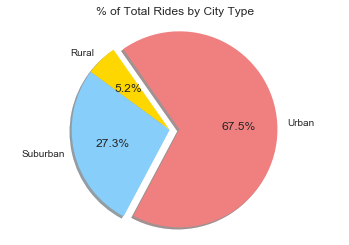

In [40]:
city_types = ["Rural", "Suburban", "Urban"]
rides = [125, 657, 1625]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(rides, explode=explode, labels=city_types, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=125)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.title('% of Total Rides by City Type')

plt.show()

In [41]:
# Total drivers
total_drivers = ride_sharing.sum()['Total Number of Drivers']
total_drivers

3346

In [42]:
# groupby city type
groupByCityType_df = ride_sharing.groupby(['City Type'])

# determine total drivers by city type
total_drivers_city_type = pd.DataFrame({"Total Drivers": groupByCityType_df["Total Number of Drivers"].sum()})
total_drivers_city_type

,Total Drivers
City Type,
Rural,104
Suburban,635
Urban,2607


## Total Drivers by City Type

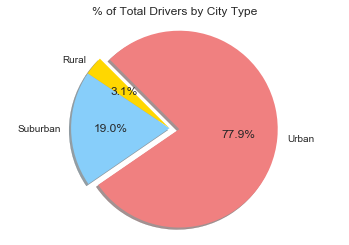

In [43]:
city_types = ["Rural", "Suburban", "Urban"]
drivers = [104, 635, 2607]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(drivers, explode=explode, labels=city_types, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=135)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.title('% of Total Drivers by City Type')

plt.show()